In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from general_graph_utils_main import *

# Plot features

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

# Quick test of pipeline

In [3]:
G, G_ud = random_graph(n=10)

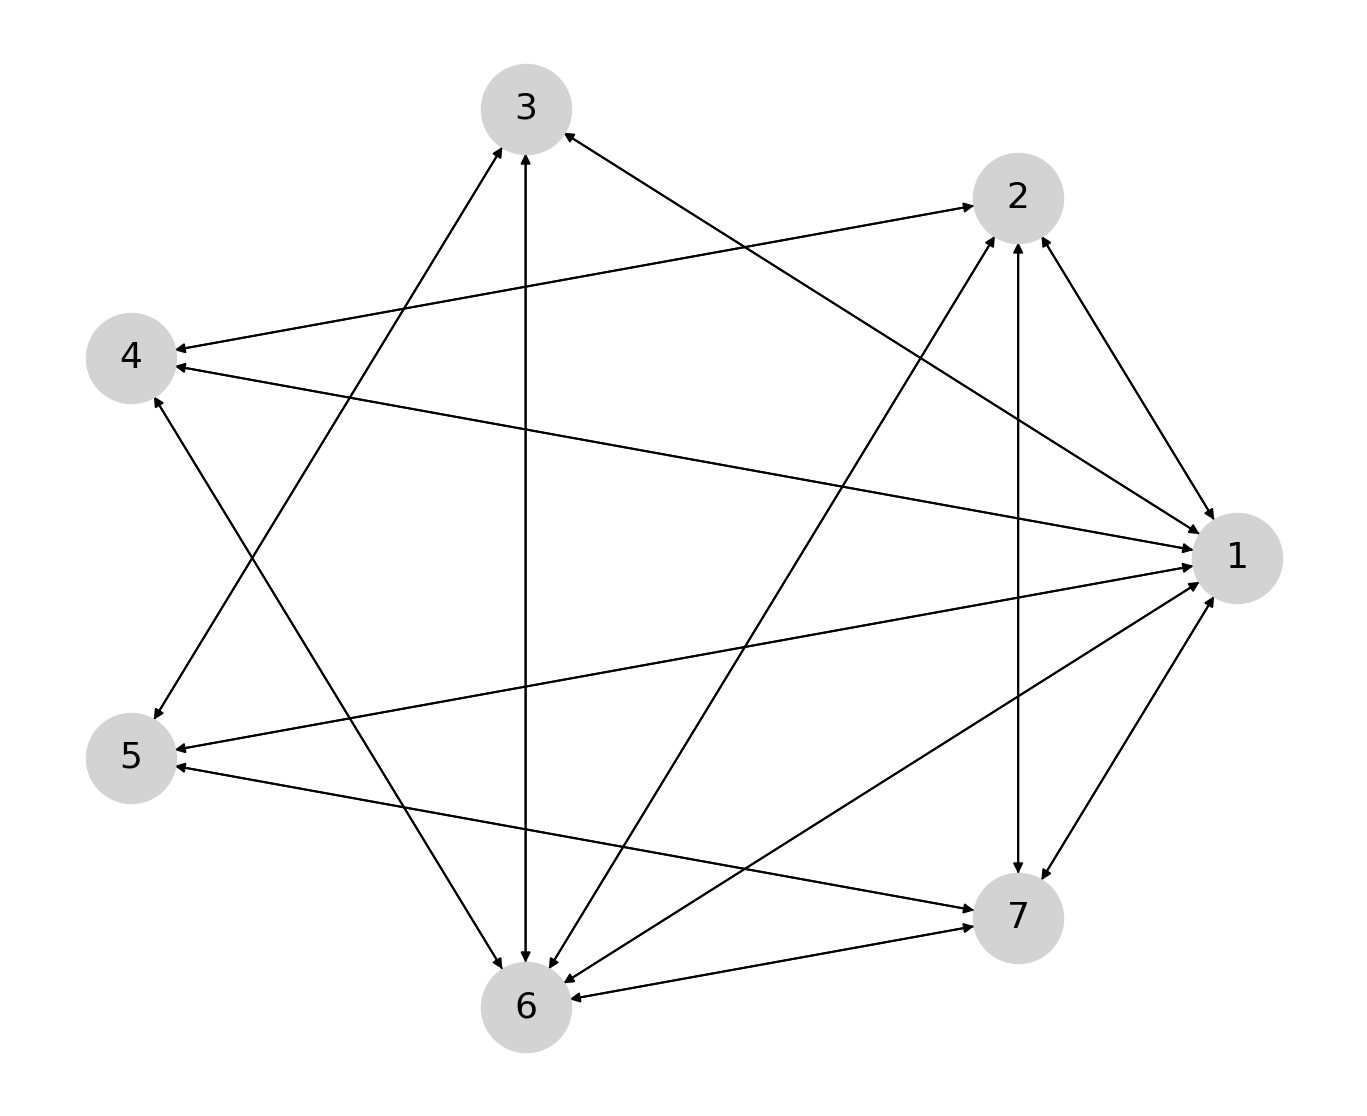

In [4]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [20]:
node_list = get_nodes(G)
num_nodes = len(node_list)

In [21]:
edge_list = get_edges(G)

In [22]:
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)

In [27]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 5): 546.73942, (1, 7): 0.00121, (1, 4): 0.18645, (1, 3): 772.14134, (1, 2): 0.5291, (1, 6): 69.90851, (2, 6): 0.5831, (2, 4): 7.2041, (2, 1): 169.11383, (2, 7): 856.88343, (3, 1): 3.88212, (3, 6): 892.0955, (3, 5): 34.68814, (4, 1): 2.73523, (4, 2): 2.58899, (4, 6): 23.46845, (5, 7): 54.34888, (5, 3): 419.40253, (5, 1): 647.52626, (6, 1): 0.39045, (6, 4): 1.69048, (6, 7): 44.66883, (6, 3): 456.42654, (6, 2): 1.6823, (7, 2): 0.06658, (7, 1): 473.45252, (7, 5): 0.00297, (7, 6): 0.04653}
[5.4673942e+02 1.2100000e-03 1.8645000e-01 7.7214134e+02 5.2910000e-01
 6.9908510e+01 5.8310000e-01 7.2041000e+00 1.6911383e+02 8.5688343e+02
 3.8821200e+00 8.9209550e+02 3.4688140e+01 2.7352300e+00 2.5889900e+00
 2.3468450e+01 5.4348880e+01 4.1940253e+02 6.4752626e+02 3.9045000e-01
 1.6904800e+00 4.4668830e+01 4.5642654e+02 1.6823000e+00 6.6580000e-02
 4.7345252e+02 2.9700000e-03 4.6530000e-02]


In [28]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [29]:
cycle_edges_backward

[[(2, 6), (1, 2), (6, 1)],
 [(2, 4), (1, 2), (4, 1)],
 [(2, 7), (1, 2), (7, 1)],
 [(3, 5), (1, 3), (5, 1)],
 [(3, 6), (1, 3), (6, 1)],
 [(6, 4), (1, 6), (4, 1)],
 [(6, 7), (1, 6), (7, 1)],
 [(7, 5), (1, 7), (5, 1)]]

In [30]:
cycle_edges_forward

[[(6, 2), (2, 1), (1, 6)],
 [(4, 2), (2, 1), (1, 4)],
 [(7, 2), (2, 1), (1, 7)],
 [(5, 3), (3, 1), (1, 5)],
 [(6, 3), (3, 1), (1, 6)],
 [(4, 6), (6, 1), (1, 4)],
 [(7, 6), (6, 1), (1, 7)],
 [(5, 7), (7, 1), (1, 5)]]

In [31]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 12.0143511    2.0579597  -16.57268962  -2.96953995  -0.7752889
  -5.24280599 -24.93176325  22.52261684]


In [54]:
cycle_labels_forward, edge_tracker = equilibrium_params(cycle_list,cycle_edges_forward,cycle_labels_forward,products_f,products_b)

IndexError: list index out of range

In [33]:
cycle_labels_forward

[[1.6823, 0.0010242659588763961058, 69.90851],
 [0.33065099375605372113, 169.11383, 0.18645],
 [0.06658, 169.11383, 0.00121],
 [419.40253, 3.88212, 546.73942],
 [456.42654, 3.88212, 69.90851],
 [23.46845, 0.39045, 0.18645],
 [0.04653, 0.39045, 0.00121],
 [54.34888, 473.45252, 546.73942]]

In [34]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-6.94973593e-17  7.74120351e-17 -1.65726896e+01 -2.96953995e+00
 -7.75288897e-01 -5.24280599e+00 -2.49317633e+01  2.25226168e+01]


In [35]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

NameError: name 'edge_tracker' is not defined

# Making new functions

In [68]:
N = 4

In [45]:
G, G_ud = random_graph_n(N)

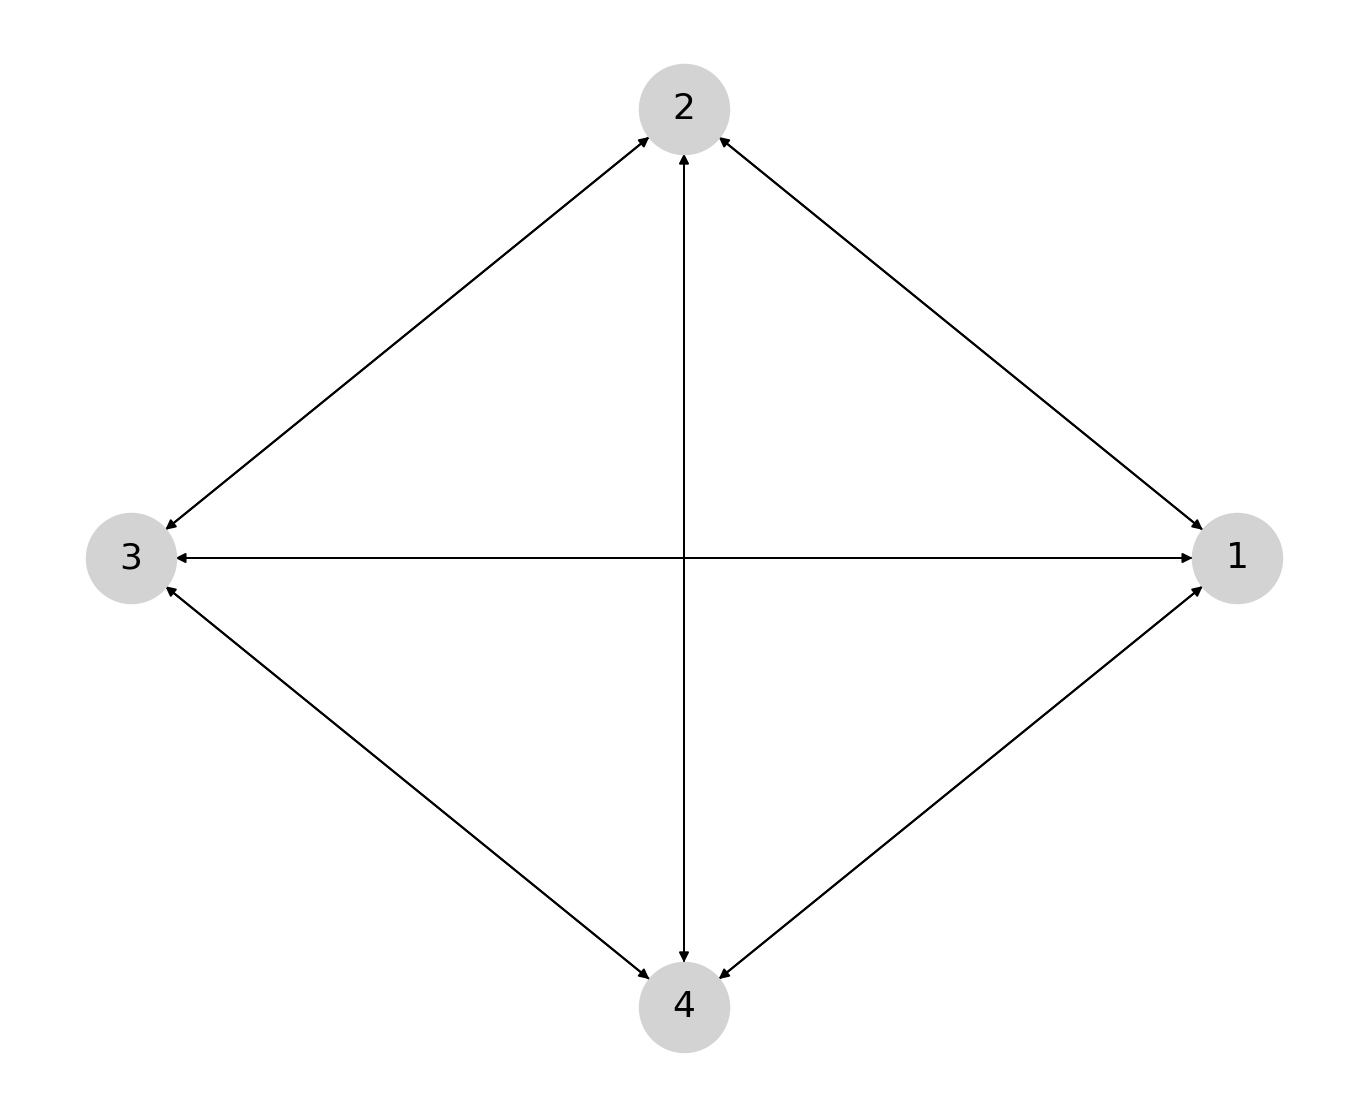

In [69]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [81]:
node_list = get_nodes(G)
num_nodes = N
edge_list = get_edges(G)
cycle_list = get_cycles(G_ud)
num_cycles = len(cycle_list)

In [82]:
cycle_list

[[4, 2, 1], [3, 2, 1], [4, 3, 1]]

In [83]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 3): 1.26146, (1, 2): 2.10832, (1, 4): 0.09863, (2, 1): 44.85007, (2, 3): 2.97785, (2, 4): 1.01615, (3, 2): 0.13139, (3, 1): 354.83953, (3, 4): 0.00378, (4, 1): 131.54341, (4, 2): 19.18472, (4, 3): 0.00638}
[1.2614600e+00 2.1083200e+00 9.8630000e-02 4.4850070e+01 2.9778500e+00
 1.0161500e+00 1.3139000e-01 3.5483953e+02 3.7800000e-03 1.3154341e+02
 1.9184720e+01 6.3800000e-03]


In [84]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [85]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-1.20018983 -5.70274899 -1.03287675]


In [150]:
def equilibrium_params_2(cycle_list,cycle_edges_forward,cycle_labels_forward,products_f,products_b):
    """
    Calculates the cycle affinity (e.g. thermodynamic force) for each cycle in a graph
    
    Parameters
    ----------
    cycle_list : list of lists
        each element is a list of the nodes connected in a given cycle.
        
    cycle_edges_forward : list of lists
        each element is a list of the edges going around one direction of a given cycle
        
    cycle_labels_forward : list of lists
        each element is a list of the labels going around one direction of a given cycle
    
    products_f : 1D array
        each element is the product of labels corresponding to the forward traversal of each cycle
    
    products_b : 1D array
        each element is the product of labels corresponding to the backward traversal of each cycle
        
    Returns
    -------
    
    cycle_labels_forward : list of lists
        updated cycle_labels_forward with new edge labels
        
    edge_tracker: list
        list of edges with altered labels
    
    """
    num_cycles = len(cycle_list)
    
    # tracking edges that have had their values altered
    edge_tracker = []

    # for each cycle in cycle_list
    for i in range(num_cycles):
        # choose a random edge in the "forward" direction
        j = np.random.randint(len(cycle_list[i]),size=1)[0]
        print(j)
        edge = cycle_edges_forward[i][j]
        edge_label = cycle_labels_forward[i][j]
        print(edge)
        print(edge_label)

        # if the edge is already in edge_tracker from another, choose another edge
        if edge in edge_tracker:
            exclude_j = list(range(len(cycle_list[i])))
            exclude_j.remove(j)
            print(exclude_j)
            j = np.random.choice(exclude_j,size=1)[0]
            print(j)
            edge = cycle_edges_forward[i][j]
            edge_label = cycle_labels_forward[i][j]
            print(edge)
            print(edge_label)
        
        # recalculate edge label using the cycle condition
        edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
        cycle_labels_forward[i][j] = edge_label
        
        # add that edge to edge_tracker
        edge_tracker.append(cycle_edges_forward[i][j])
    
    return cycle_labels_forward, edge_tracker

In [151]:
cycle_labels_forward, edge_tracker = equilibrium_params_2(cycle_list,cycle_edges_forward,cycle_labels_forward,products_f,products_b)

1
(2, 1)
15254230062.377549948
1
(2, 1)
7321.652052255850901
[0, 2]
2
(1, 3)
6.8942781993829304094
1
(3, 1)
354.83953000000020828


In [110]:
exclude_j = list(range(len(cycle_list[i])))
exclude_j.remove(2)
exclude_j

[0, 1]

In [152]:
num_cycles = len(cycle_list)
# tracking edges that have had their values altered
edge_tracker = []

for i in range(num_cycles):
        # choose a random edge in the "forward" direction
        j = np.random.randint(len(cycle_list[i]),size=1)[0]
        print(j)
        edge = cycle_edges_forward[i][j]
        edge_label = cycle_labels_forward[i][j]
        print(edge)
        print(edge_label)

        # if the edge is already in edge_tracker from another, choose another edge
        if edge in edge_tracker:
            exclude_j = list(range(len(cycle_list[i])))
            exclude_j.remove(j)
            print(exclude_j)
            j = np.random.choice(exclude_j,size=1)[0]
            print(j)
            edge = cycle_edges_forward[i][j]
            edge_label = cycle_labels_forward[i][j]
            print(edge)
            print(edge_label)
        
        # recalculate edge label using the cycle condition
        edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
        cycle_labels_forward[i][j] = edge_label
        
        # add that edge to edge_tracker
        edge_tracker.append(cycle_edges_forward[i][j])

# check that the cycle affinities are = 0
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)

for i in range(num_cycles):
    while total_affinities[i] >= 2e-16:
        


1
(2, 1)
118422377187.91114685
2
(1, 3)
16.117454924637860293
0
(4, 3)
0.017922283843677273248


In [157]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-2.04940086  2.59168291 -3.44089393]


In [89]:
# reset labels
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)

In [90]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [91]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[-2.04940086e+00 -8.49211020e-01 -6.46726596e-17]


In [75]:
# tracking edges that have had their values altered
edge_tracker = []

# for each cycle in cycle_list
for i in range(num_cycles):
    # choose a random edge in the "forward" direction
    j = np.random.randint(len(cycle_list[i])-1,size=1)[0]
    edge = cycle_edges_forward[i][j]
    edge_label = cycle_labels_forward[i][j]
    
    # if the edge is already in edge_tracker from another, choose another edge
    if edge in edge_tracker:
        k = j
        exclude_j = list(range(1,k)) + list(range(k+1, len(cycle_list[i])-1))
        j = np.random.randint(exclude_j,size=1)[0]
        edge = cycle_edges_forward[i][j]
        edge_label = cycle_labels_forward[i][j]
    
    edge_label = 1/(products_f[i]/(edge_label*products_b[i]))
    cycle_labels_forward[i][j] = edge_label
    # add that edge to edge_tracker
    edge_tracker.append(cycle_edges_forward[i][j])

In [76]:
edge_tracker

[(3, 2), (2, 1), (3, 4)]

In [77]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[ 1.95156391e-17 -2.36898175e-17  5.03069808e-17]


If the affinity is < 2e-16, we will count it as 0.